# Web scraping for articles

In [1]:
! pip install beautifulsoup4

In [2]:
! pip install requests

  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)


In [1]:
# Import libraries
import pandas as pd
import urllib.request,sys,time
from bs4 import BeautifulSoup
import requests

In [2]:
pagesToGet= 40

upperframe=[]  
for page in range(1,pagesToGet+1):
    print('processing page :', page)
    url = 'https://www.politifact.com/factchecks/list/?page='+str(page)
    print(url)
    
    #an exception might be thrown, so the code should be in a try-except block
    try:
        #use the browser to get the url. This is suspicious command that might blow up.
        page=requests.get(url)                             # this might throw an exception if something goes wrong.
    
    except Exception as e:                                   # this describes what to do if an exception is thrown
        error_type, error_obj, error_info = sys.exc_info()      # get the exception information
        print ('ERROR FOR LINK:',url)                          #print the link that cause the problem
        print (error_type, 'Line:', error_info.tb_lineno)     #print error info and line that threw the exception
        continue                                              #ignore this page. Abandon this and go back.
    time.sleep(2)   
    soup=BeautifulSoup(page.text,'html.parser')
    frame=[]
    links=soup.find_all('li',attrs={'class':'o-listicle__item'})
    print(len(links))
    filename="data.csv"
    f=open(filename,"w", encoding = 'utf-8')
    headers="Statement,Link,Date, Source, Label\n"
    f.write(headers)
    
    for j in links:
        Statement = j.find("div",attrs={'class':'m-statement__quote'}).text.strip()
        Link = "https://www.politifact.com"
        Link += j.find("div",attrs={'class':'m-statement__quote'}).find('a')['href'].strip()
        Date = j.find('div',attrs={'class':'m-statement__body'}).find('footer').text[-14:-1].strip()
        Source = j.find('div', attrs={'class':'m-statement__meta'}).find('a').text.strip()
        Label = j.find('div', attrs ={'class':'m-statement__content'}).find('img',attrs={'class':'c-image__original'}).get('alt').strip()
        frame.append((Statement,Link,Date,Source,Label))
        f.write(Statement.replace(",","^")+","+Link+","+Date.replace(",","^")+","+Source.replace(",","^")+","+Label.replace(",","^")+"\n")
    upperframe.extend(frame)
f.close()
data=pd.DataFrame(upperframe, columns=['Statement','Link','Date','Source','Label'])
data.head()

processing page : 1
https://www.politifact.com/factchecks/list/?page=1
30
processing page : 2
https://www.politifact.com/factchecks/list/?page=2
30
processing page : 3
https://www.politifact.com/factchecks/list/?page=3
30
processing page : 4
https://www.politifact.com/factchecks/list/?page=4
30
processing page : 5
https://www.politifact.com/factchecks/list/?page=5
30
processing page : 6
https://www.politifact.com/factchecks/list/?page=6
30
processing page : 7
https://www.politifact.com/factchecks/list/?page=7
30
processing page : 8
https://www.politifact.com/factchecks/list/?page=8
30
processing page : 9
https://www.politifact.com/factchecks/list/?page=9
30
processing page : 10
https://www.politifact.com/factchecks/list/?page=10
30
processing page : 11
https://www.politifact.com/factchecks/list/?page=11
30
processing page : 12
https://www.politifact.com/factchecks/list/?page=12
30
processing page : 13
https://www.politifact.com/factchecks/list/?page=13
30
processing page : 14
https://w

,Statement,Link,Date,Source,Label
0,A flag expressing support for police officers ...,https://www.politifact.com/factchecks/2021/jun...,"June 25, 2021",Facebook posts,false
1,"""The Second Amendment, from the day it was pas...",https://www.politifact.com/factchecks/2021/jun...,"June 25, 2021",Joe Biden,false
2,Says the U.S. government caused the coronaviru...,https://www.politifact.com/factchecks/2021/jun...,"June 25, 2021",Bloggers,false
3,Says Ivanka Trump was targeted in the Florida ...,https://www.politifact.com/factchecks/2021/jun...,"June 25, 2021",Facebook posts,false
4,Says Gov. Ron DeSantis “just signed legislatio...,https://www.politifact.com/factchecks/2021/jun...,"June 25, 2021",Viral image,false


In [3]:
df = data.to_csv('df.csv')

In [4]:
data.tail(20)

,Statement,Link,Date,Source,Label
1180,“Major decision protecting voting rights in Pa...,https://www.politifact.com/factchecks/2020/oct...,"ober 29, 2020",Justin Clark,barely-true
1181,A Detroit TV station aired the election result...,https://www.politifact.com/factchecks/2020/oct...,"ober 29, 2020",YouTube videos,half-true
1182,"“When asked about court-packing, Biden's staff...",https://www.politifact.com/factchecks/2020/oct...,"ober 29, 2020",Donald Trump,false
1183,Says U.S. Rep. Ann Wagner “voted five times ag...,https://www.politifact.com/factchecks/2020/oct...,"ober 29, 2020",Jill Schupp,mostly-true
1184,“I have been very clear with DACA. Even in my ...,https://www.politifact.com/factchecks/2020/oct...,"ober 29, 2020",Joni Ernst,half-true
1185,Says Kamala Harris said looters are just feedi...,https://www.politifact.com/factchecks/2020/oct...,"ober 29, 2020",Facebook posts,false
1186,"Says Jill Biden said, “Whatever is on Hunter’s...",https://www.politifact.com/factchecks/2020/oct...,"ober 29, 2020",Viral image,false
1187,My 2018 election was the first time Speaker Ro...,https://www.politifact.com/factchecks/2020/oct...,"ober 29, 2020",Robyn Vining,true
1188,“The Columbia school buildings in my district ...,https://www.politifact.com/factchecks/2020/oct...,"ober 29, 2020",Cheri Toalson Reisch,barely-true
1189,Joe Biden “wants to get rid of something calle...,https://www.politifact.com/factchecks/2020/oct...,"ober 29, 2020",Facebook posts,true


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize



In [6]:
!pip install textblob      
import textblob            
from textblob import TextBlob

In [7]:
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [8]:
data.head()

,Statement,Link,Date,Source,Label
0,A flag expressing support for police officers ...,https://www.politifact.com/factchecks/2021/jun...,"June 25, 2021",Facebook posts,false
1,"""The Second Amendment, from the day it was pas...",https://www.politifact.com/factchecks/2021/jun...,"June 25, 2021",Joe Biden,false
2,Says the U.S. government caused the coronaviru...,https://www.politifact.com/factchecks/2021/jun...,"June 25, 2021",Bloggers,false
3,Says Ivanka Trump was targeted in the Florida ...,https://www.politifact.com/factchecks/2021/jun...,"June 25, 2021",Facebook posts,false
4,Says Gov. Ron DeSantis “just signed legislatio...,https://www.politifact.com/factchecks/2021/jun...,"June 25, 2021",Viral image,false


In [9]:
data.dtypes

Statement    object
Link         object
Date         object
Source       object
Label        object
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  1200 non-null   object
 1   Link       1200 non-null   object
 2   Date       1200 non-null   object
 3   Source     1200 non-null   object
 4   Label      1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [11]:
## Cleaning the text input for betting understanding of Machine..##

##Converting all review into Lowercase..###
data['Statement']= data['Statement'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [12]:
## removing punctuation from review..#
import string
data['Statement']=data['Statement'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [13]:
data['Statement']=data['Statement'].str.replace('[0-9]','')

<ipython-input-13-56a32cf7141c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Statement']=data['Statement'].str.replace('[0-9]','')


In [14]:
## removing all stopwords(english)....###
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to C:\Users\ASHISH
[nltk_data]     YENKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
stop_words=stopwords.words('english')

In [16]:

data['Statement']=data['Statement'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [17]:
data.head(5)

,Statement,Link,Date,Source,Label
0,flag expressing support police officers violat...,https://www.politifact.com/factchecks/2021/jun...,"June 25, 2021",Facebook posts,false
1,second amendment day passed limited type peopl...,https://www.politifact.com/factchecks/2021/jun...,"June 25, 2021",Joe Biden,false
2,says us government caused coronavirus pandemic...,https://www.politifact.com/factchecks/2021/jun...,"June 25, 2021",Bloggers,false
3,says ivanka trump targeted florida condominium...,https://www.politifact.com/factchecks/2021/jun...,"June 25, 2021",Facebook posts,false
4,says gov ron desantis “just signed legislation...,https://www.politifact.com/factchecks/2021/jun...,"June 25, 2021",Viral image,false


In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\ASHISH
[nltk_data]     YENKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
from textblob import Word
data['Statement']= data['Statement'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [20]:
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['Statement']= data['Statement'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [21]:
data['Statement'].head()

0    flag expressing support police officer violate...
1    second amendment day passed limited type peopl...
2    say  government caused coronavirus pandemic se...
3    say ivanka trump targeted florida condominium ...
4    say gov ron desantis “just signed legislation ...
Name: Statement, dtype: object

In [22]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(data['Statement'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aaron  aarp  abandoned  aberdeen  ability  able  abolish  aborted  \
0         0     0          0         0        0     0        0        0   
1         0     0          0         0        0     0        0        0   
2         0     0          0         0        0     0        0        0   
3         0     0          0         0        0     0        0        0   
4         0     0          0         0        0     0        0        0   
...     ...   ...        ...       ...      ...   ...      ...      ...   
1195      0     0          0         0        0     0        0        0   
1196      0     0          0         0        0     0        0        0   
1197      0     0          0         0        0     0        0        0   
1198      0     0          0         0        0     0        0        0   
1199      0     0          0         0        0     0        0        0   

      abortion  about  ...  youll  young  younger  youre  youth  youtube  \
0            0      0  

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data['Statement'])
print(TFIDF)


  (0, 631)	0.3387887907057408
  (0, 3621)	0.37381399035371143
  (0, 2336)	0.3183003623314062
  (0, 2545)	0.2574627956140789
  (0, 3296)	0.262786734309101
  (0, 1178)	0.37381399035371143
  (0, 1271)	0.6075271821155405
  (1, 2402)	0.2940552565090498
  (1, 3676)	0.26650320031923413
  (1, 1452)	0.2300813631700015
  (1, 760)	0.4525857167146913
  (1, 2471)	0.1459618680741044
  (1, 3524)	0.5330064006384683
  (1, 1939)	0.2940552565090498
  (1, 2440)	0.21670685595176306
  (1, 835)	0.1739957388277684
  (1, 124)	0.2503862806304297
  (1, 3012)	0.2300813631700015
  (2, 2381)	0.3233036058383303
  (2, 777)	0.14154839655873921
  (2, 3685)	0.24880118774595272
  (2, 2864)	0.3055836088817825
  (2, 3551)	0.283259052915193
  (2, 484)	0.26271853607846657
  (2, 3586)	0.15457856054678104
  :	:
  (1196, 2983)	0.10628180333984916
  (1197, 896)	0.542509552558769
  (1197, 2297)	0.44084666203226713
  (1197, 1030)	0.4111121726958053
  (1197, 94)	0.4619436179590562
  (1197, 777)	0.23752088097926358
  (1197, 2471)	0.

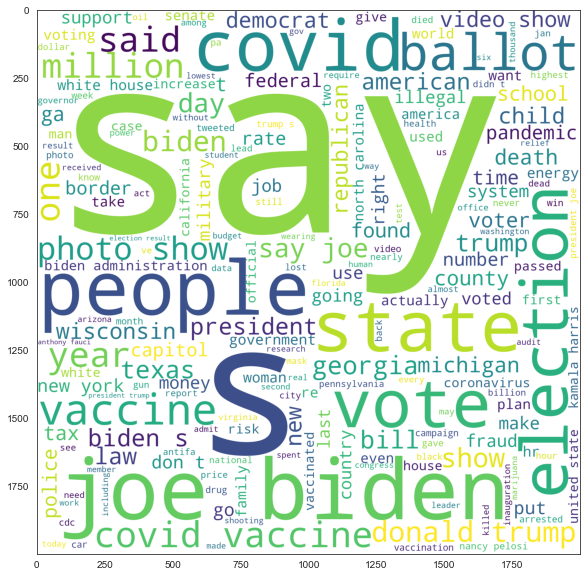

In [24]:
Review_wordcloud = ' '.join(data['Statement'])
Q_wordcloud=WordCloud(
                    background_color='white',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

In [25]:
freq = pd.Series(' '.join(data['Statement']).split()).value_counts()[0:20]
freq


say          278
biden        135
covid        121
show         109
joe          103
vaccine       94
election      86
state         82
trump         80
people        79
ballot        62
vote          61
photo         55
president     51
“the          51
year          49
new           47
said          45
million       40
donald        40
dtype: int64

In [27]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to C:\Users\ASHISH
[nltk_data]     YENKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
from textblob import TextBlob
data['polarity'] = data['Statement'].apply(lambda x: TextBlob(x).sentiment[0])
data[['Statement','polarity']].head(5)

,Statement,polarity
0,flag expressing support police officer violate...,0.00000
1,second amendment day passed limited type peopl...,0.17619
2,say government caused coronavirus pandemic se...,0.00000
3,say ivanka trump targeted florida condominium ...,0.00000
4,say gov ron desantis “just signed legislation ...,0.00000


In [29]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

,Statement,Link,Date,Source,Label,polarity
1,second amendment day passed limited type peopl...,https://www.politifact.com/factchecks/2021/jun...,"June 25, 2021",Joe Biden,false,0.176190
7,say eric trump said “raised nearly million chi...,https://www.politifact.com/factchecks/2021/jun...,"June 25, 2021",Instagram posts,false,0.100000
10,“our legal president president trump signed ce...,https://www.politifact.com/factchecks/2021/jun...,"June 24, 2021",TikTok posts,pants-fire,0.200000
17,supreme court ruling rare,https://www.politifact.com/factchecks/2021/jun...,"June 23, 2021",Trey Wingo,false,0.300000
22,say president john kennedy said “there people...,https://www.politifact.com/factchecks/2021/jun...,"June 22, 2021",Facebook posts,false,0.066667


In [30]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative') 


In [31]:
sent_type(data['polarity'])

neutral
positive
neutral
neutral
neutral
neutral
negative
positive
neutral
neutral
positive
neutral
neutral
neutral
negative
negative
neutral
positive
negative
neutral
negative
neutral
positive
neutral
neutral
negative
neutral
neutral
negative
neutral
neutral
neutral
neutral
negative
positive
neutral
neutral
neutral
positive
negative
positive
negative
negative
neutral
negative
positive
positive
negative
neutral
neutral
neutral
positive
negative
neutral
neutral
neutral
neutral
neutral
neutral
negative
negative
neutral
negative
neutral
positive
negative
neutral
neutral
positive
neutral
positive
neutral
negative
neutral
negative
positive
negative
neutral
negative
positive
neutral
neutral
negative
neutral
negative
positive
positive
neutral
negative
neutral
neutral
neutral
negative
positive
negative
neutral
positive
neutral
positive
neutral
neutral
negative
negative
positive
neutral
neutral
neutral
neutral
neutral
positive
negative
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neu

In [32]:
data["category"]=data['polarity']

In [33]:
data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"


In [34]:
data["category"]=data["category"].astype('category')
data.dtypes

Statement      object
Link           object
Date           object
Source         object
Label          object
polarity      float64
category     category
dtype: object

<AxesSubplot:xlabel='category', ylabel='count'>

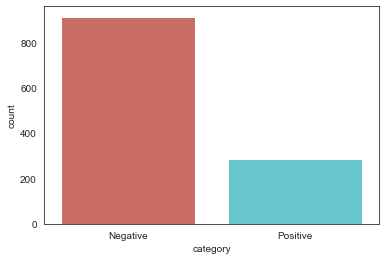

In [35]:
sns.countplot(x='category',data=data,palette='hls')

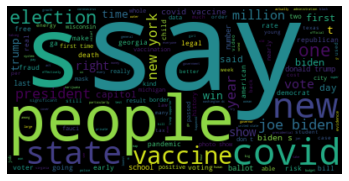

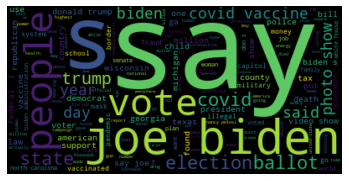

In [37]:
positive_Statement= data[data.category=='Positive']
negative_Statement= data[data.category=='Negative']
positive_reviews_text=" ".join(positive_Statement.Statement.to_numpy().tolist())
negative_reviews_text=" ".join(negative_Statement.Statement.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()